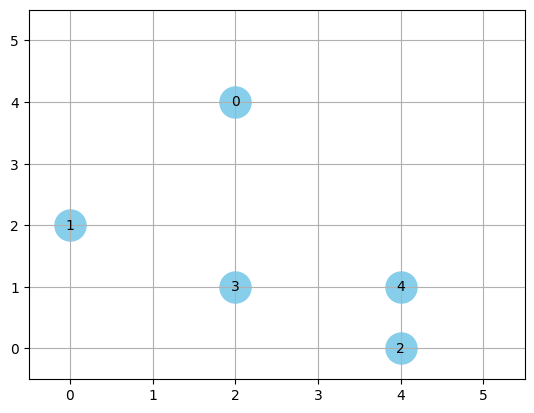

최소이동거리 = 10
최소이동경로는 2 가지
[0, 1, 3, 4, 2]
[1, 0, 3, 4, 2]
[2, 4, 3, 0, 1]
[2, 4, 3, 1, 0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 좌표를 순서대로 입력
L = np.array([[2,4],[0,2],[4,0],[2,1],[4,1]])

# 전체 칸수를 입력
G = 6

# 그래프 그리기
x,y = L.T
C = len(L)

i = 0
while i < C:
  plt.scatter(x[i], y[i], c='skyblue', s=500)
  plt.text(x[i], y[i], i, ha='center', va='center')
  i = i+1
plt.xlim(-0.5, G-0.5)
plt.ylim(-0.5, G-0.5)
plt.grid(True)
plt.show()

# 포인트 간 거리
i = 0
j = 0
M = np.zeros((C,C), dtype = int)
while i < C:
  while j < C:
    M[i,j] = abs(L[i][0]-L[j][0])+abs(L[i][1]-L[j][1])
    j=j+1
  j = 0
  i=i+1

# 경로
N = [0]
i=1
while i<C:
  N.append(i)
  i=i+1
visit = [0] * C
arr = [0] * C
arr_list = []
def permutaion(level):
    if level >= C:
        arr_list.append(arr[:])
        return
    else:
        for i in range(C):
            if visit[i]: continue
            visit[i] = 1
            arr[level] = N[i]
            permutaion(level + 1)
            visit[i] = 0
permutaion(0)

# 경로 거리
arr_result=[]
i=0
while i<len(arr_list):
  j=0
  result=0
  while j<C-1:
    result = result+M[arr_list[i][j],arr_list[i][j+1]]
    j=j+1
  arr_result.append(result)
  i=i+1

# 최소이동거리
R=min(arr_result)
print(f"최소이동거리 = {R}")

# 최소이동경로 수
RI=[]
for i in range(len(arr_result)):
  if arr_result[i]==min(arr_result):
    RI.append(i)
print(f"최소이동경로는 {int(len(RI)/2)} 가지")

# 최소이동경로
for i in range(len(RI)):
  print(arr_list[RI[i]])